In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = 'https://raw.githubusercontent.com/psp88/AME-project/main/Ass3_data_1.csv'
df = pd.read_csv(dataset)

In [ ]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5398 non-null   object
 1   Sentiment  5398 non-null   object
dtypes: object(2)
memory usage: 84.5+ KB


<Axes: xlabel='Sentiment', ylabel='count'>

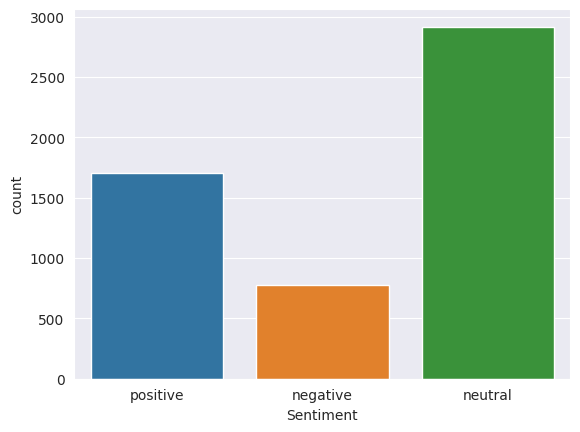

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x = df.Sentiment)

In [ ]:
df['Length'] = df['Sentence'].apply(len)
df.head()

,Sentence,Sentiment,Length
0,The GeoSolutions technology will leverage Bene...,positive,218
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55
2,"For the last quarter of 2010 , Componenta 's n...",positive,193
3,According to the Finnish-Russian Chamber of Co...,neutral,128
4,The Swedish buyout firm has sold its remaining...,neutral,135


In [ ]:
df_positive = df[df['Sentiment'] == 'positive']
df_neutral = df[df['Sentiment'] == 'neutral']
df_negative = df[df['Sentiment'] == 'negative']

df['Length'].describe()

count    5398.000000
mean      117.116154
std        56.368507
min         9.000000
25%        73.000000
50%       107.000000
75%       150.000000
max       315.000000
Name: Length, dtype: float64

array([<Axes: title={'center': 'negative'}>,
       <Axes: title={'center': 'neutral'}>,
       <Axes: title={'center': 'positive'}>], dtype=object)

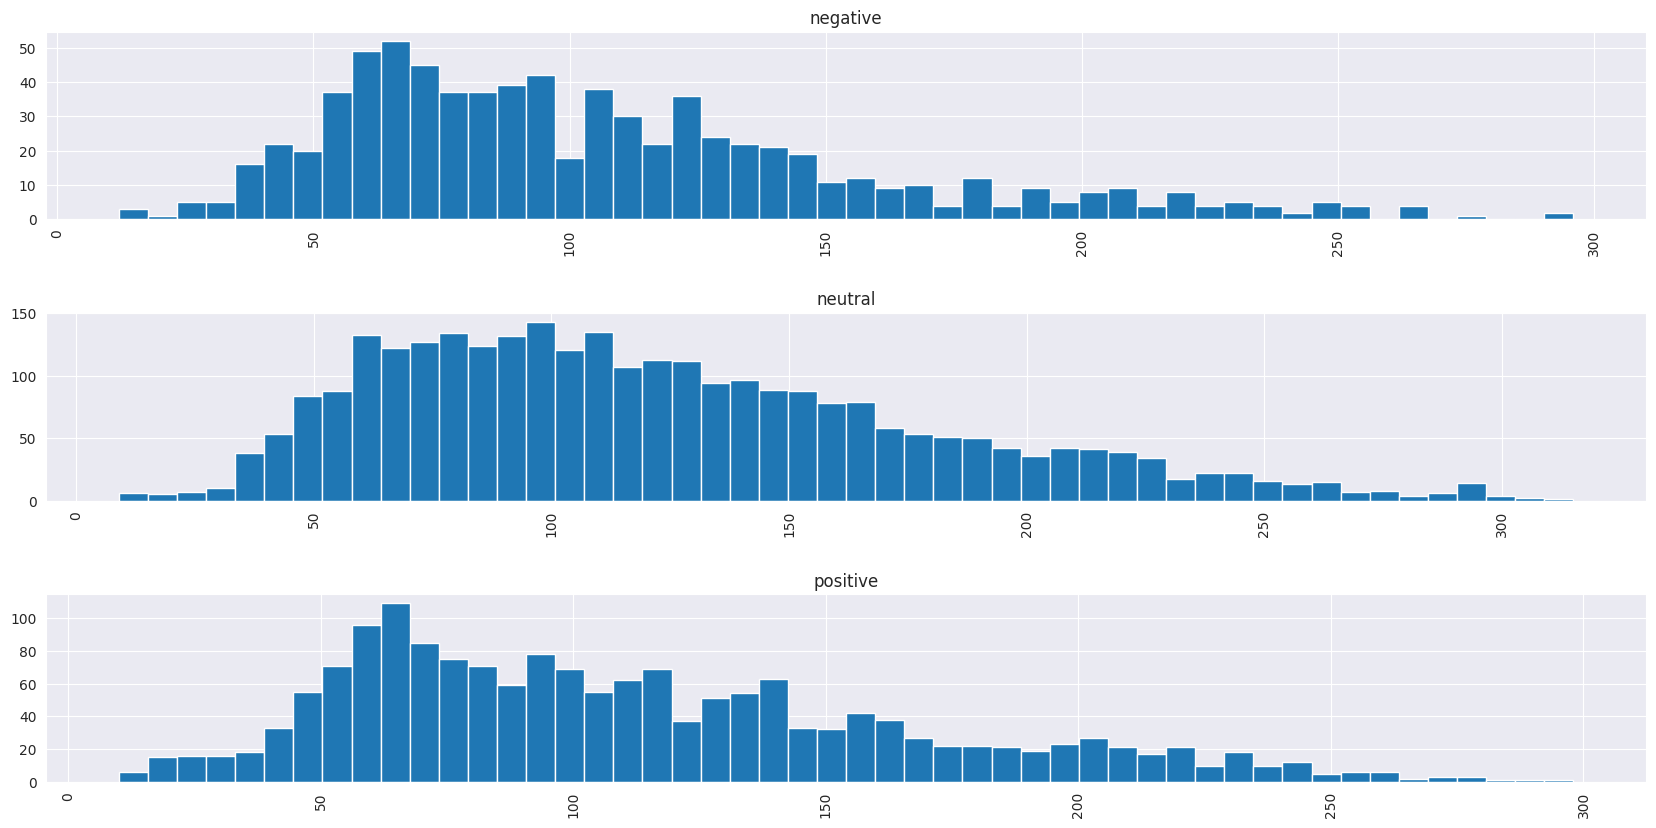

In [ ]:
#visualizing the length of sentences
df.hist(column = 'Length', by = 'Sentiment', bins = 50, figsize = (20, 10), layout = (3, 1))

In [ ]:
#preprocessing the data - removing stopwords and punctuations, changing text to lowercase
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

def Remove_Stopwords(text):
  final = []
  for i in text.split():
    if i.strip().lower() not in stop_words:
      final.append(i.strip().lower())
  return ' '.join(final)

df_positive['Sentence'] = df_positive['Sentence'].apply(Remove_Stopwords)
df_neutral['Sentence'] = df_neutral['Sentence'].apply(Remove_Stopwords)
df_negative['Sentence'] = df_negative['Sentence'].apply(Remove_Stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Text(0.5, 1.0, 'Negative Sentiment')

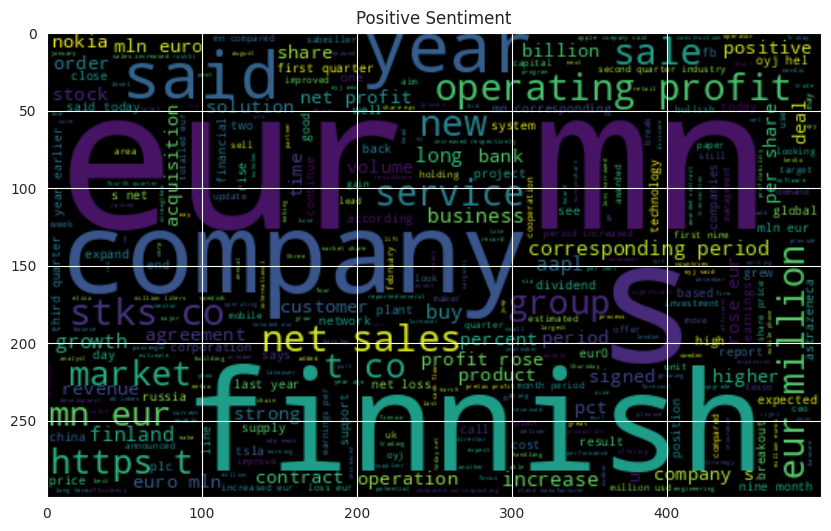

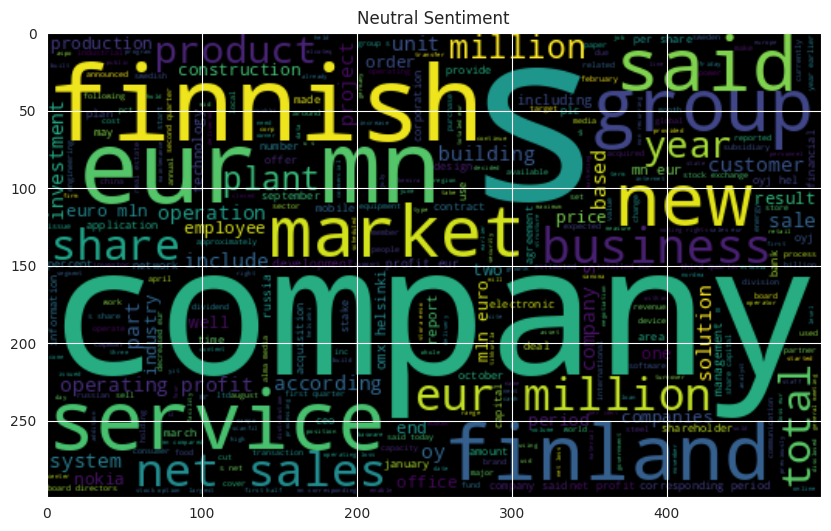

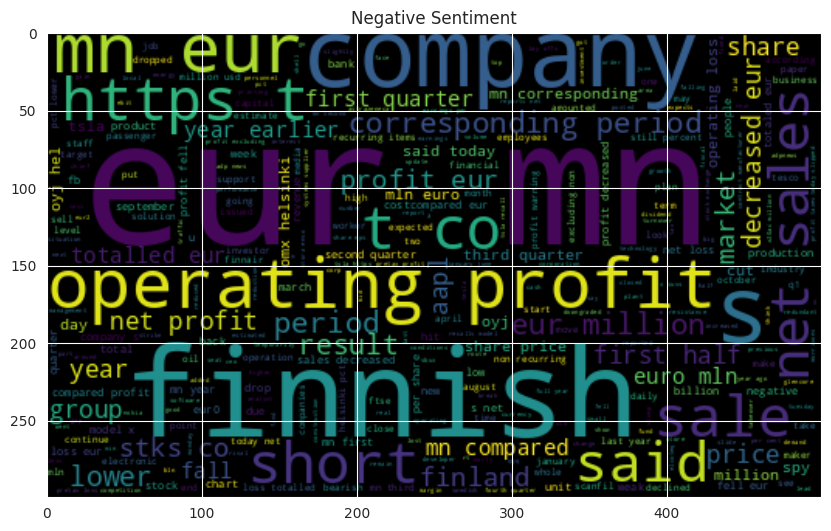

In [ ]:
#visualize the class-wise distribution of words in the dataset

plt.figure(figsize = (10,12)) # Text that is Positive sentiment
wc = WordCloud(max_words = 500 , width = 500 , height = 300).generate(" ".join(df_positive['Sentence']))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Positive Sentiment')

plt.figure(figsize = (10,12)) # Text that is Neutral sentiment
wc = WordCloud(max_words = 500 , width = 500 , height = 300).generate(" ".join(df_neutral['Sentence']))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Neutral Sentiment')

plt.figure(figsize = (10,12)) # Text that is Negative sentiment
wc = WordCloud(max_words = 500 , width = 500 , height = 300).generate(" ".join(df_negative['Sentence']))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Negative Sentiment')

In [ ]:
#preprocessing the dataset - lemmatizing the sentences and removing non-alphabetic characters
nltk.download('punkt')
nltk.download('wordnet')
lemma = WordNetLemmatizer()

def CleanText(text):
  text = text.lower()
  words = nltk.word_tokenize(text)
  words = ' '.join([lemma.lemmatize(word) for word in words if word not in stop_words])
  text = ''.join(words)
  text = re.sub('[^a-z]',' ',text)
  return text

df['Cleaned_Sentence'] = df['Sentence'].apply(CleanText)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Sentence,Sentiment,Length,Cleaned_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,218,geosolutions technology leverage benefon s gp...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,last quarter componenta s net sale doubl...
3,According to the Finnish-Russian Chamber of Co...,neutral,128,according finnish russian chamber commerce maj...
4,The Swedish buyout firm has sold its remaining...,neutral,135,swedish buyout firm sold remaining percen...


In [ ]:
#splitting the dataset into test_data and train_data
X = df['Cleaned_Sentence']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [ ]:
#encoding the sentiment data
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

#vectorizing the dataset using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
#training the model using SVM
svm = SVC(probability = True)
svm.fit(X_train_vec, y_train_enc)

#training the model using Multinomial Naive-Bayes
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train_enc)

MultinomialNB()

In [ ]:
#predicting and comparing accuracy using roc_auc_score
pred_svm = svm.predict_proba(X_test_vec)
roc_auc_svm = roc_auc_score(y_test_enc, pred_svm, multi_class='ovr')

pred_mnb_tfidf = mnb.predict_proba(X_test_vec)
roc_auc_mnb = roc_auc_score(y_test_enc, pred_mnb_tfidf, multi_class='ovr')


print(roc_auc_svm, roc_auc_mnb)

0.8005889456108912 0.7955801180615714
